# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [7]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

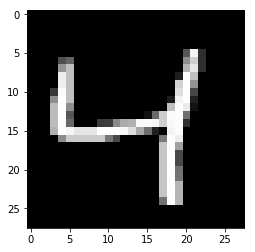

In [9]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [14]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]  # 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')
# None indicates that the first dimension, corresponding to the batch size, can be of any size.

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu) 

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost) 

## Training

In [15]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [16]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6937
Epoch: 1/20... Training loss: 0.6903
Epoch: 1/20... Training loss: 0.6867
Epoch: 1/20... Training loss: 0.6828
Epoch: 1/20... Training loss: 0.6771
Epoch: 1/20... Training loss: 0.6709
Epoch: 1/20... Training loss: 0.6635
Epoch: 1/20... Training loss: 0.6550
Epoch: 1/20... Training loss: 0.6451
Epoch: 1/20... Training loss: 0.6325
Epoch: 1/20... Training loss: 0.6186
Epoch: 1/20... Training loss: 0.6047
Epoch: 1/20... Training loss: 0.5909
Epoch: 1/20... Training loss: 0.5726
Epoch: 1/20... Training loss: 0.5527
Epoch: 1/20... Training loss: 0.5361
Epoch: 1/20... Training loss: 0.5164
Epoch: 1/20... Training loss: 0.4973
Epoch: 1/20... Training loss: 0.4781
Epoch: 1/20... Training loss: 0.4654
Epoch: 1/20... Training loss: 0.4451
Epoch: 1/20... Training loss: 0.4278
Epoch: 1/20... Training loss: 0.4159
Epoch: 1/20... Training loss: 0.4027
Epoch: 1/20... Training loss: 0.3823
Epoch: 1/20... Training loss: 0.3778
Epoch: 1/20... Training loss: 0.3586
E

Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1869
E

Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1644
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1483
E

Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1369
E

Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1197
E

Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1227
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1196
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1154
E

Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1084
E

Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1021
E

Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.0957
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1063
E

Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.0985
E

Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.1015
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.1001
E

Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0983


Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0870
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0884
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0978
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0986
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0941
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0983
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0889
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

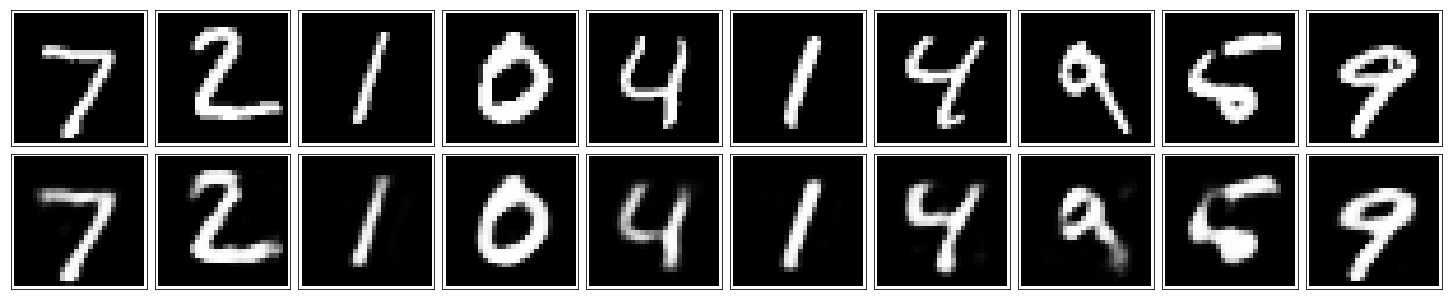

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

top row: original image<br>
bottom row: reconstructed image<br>

In [19]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.